In [66]:
import pandas as pd
import numpy as np
import tushare as ts
from datetime import date, timedelta

In [67]:
earlyday = date.today() - timedelta(2000)
data = ts.get_hists(["sh"], start=str(earlyday))
data.to_csv('sh_index.csv')

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


d:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\tushare\stock\trading.py:772: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)


In [68]:
data = data.reindex(index=data.index[::-1])
data = data.reset_index(drop=True)

In [69]:

price = data.loc[:,'close']
print(price)

0      3292.59
1      3316.42
2      3254.63
3      3234.82
4      3260.35
        ...   
599    3312.35
600    3310.65
601    3328.39
602    3322.03
603    3285.10
Name: close, Length: 604, dtype: float64


In [70]:
price_norm = price/max(price)
print(price_norm)

0      0.886208
1      0.892622
2      0.875991
3      0.870659
4      0.877530
         ...   
599    0.891526
600    0.891069
601    0.895843
602    0.894132
603    0.884192
Name: close, Length: 604, dtype: float64


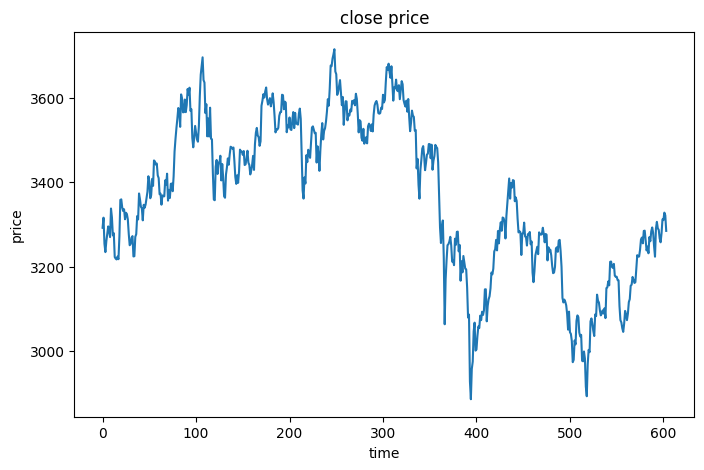

In [71]:
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(8,5))
plt.plot(price)
plt.title('close price')
plt.xlabel('time')
plt.ylabel('price')
plt.show()

In [72]:
print(price)

0      3292.59
1      3316.42
2      3254.63
3      3234.82
4      3260.35
        ...   
599    3312.35
600    3310.65
601    3328.39
602    3322.03
603    3285.10
Name: close, Length: 604, dtype: float64


In [73]:
def extract_data(data, time_step):
    X = []
    y = []
    for i in range(len(data)-time_step):
        X.append([a for a in data[i:i+time_step]])
        y.append(data[i+time_step])
    X = np.array(X)
    X = X.reshape(X.shape[0], X.shape[1], 1)
    return X, y


In [74]:
X, y = extract_data(price_norm, time_step=8)


In [75]:
print(X[0, :, :])

[[0.88620783]
 [0.89262173]
 [0.87599082]
 [0.87065891]
 [0.87753037]
 [0.88249892]
 [0.88703951]
 [0.88387428]]


In [86]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
model = Sequential()
model.add(SimpleRNN(units=5, input_shape=(8, 1), activation='relu'))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 5)                 35        
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [87]:
print(X.shape, len(y))

(596, 8, 1) 596


In [88]:
y = np.array(y)

In [89]:
model.fit(X, y, batch_size=30, epochs=200)

Epoch 1/200
20/20 [==============================] - 1s 2ms/step - loss: 0.2167
Epoch 2/200
20/20 [==============================] - 0s 2ms/step - loss: 0.1101
Epoch 3/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0401
Epoch 4/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 5/200
20/20 [==============================] - 0s 2ms/step - loss: 4.0658e-04
Epoch 6/200
20/20 [==============================] - 0s 2ms/step - loss: 2.3997e-04
Epoch 7/200
20/20 [==============================] - 0s 2ms/step - loss: 2.0709e-04
Epoch 8/200
20/20 [==============================] - 0s 2ms/step - loss: 1.9206e-04
Epoch 9/200
20/20 [==============================] - 0s 2ms/step - loss: 1.9210e-04
Epoch 10/200
20/20 [==============================] - 0s 2ms/step - loss: 1.9169e-04
Epoch 11/200
20/20 [==============================] - 0s 2ms/step - loss: 1.9198e-04
Epoch 12/200
20/20 [==============================] - 0s 2ms/step - loss: 1.9149e-04
Epoch

In [96]:
y_train_predict = model.predict(X)*max(price)
y_train = [i*max(price) for i in y]

19/19 [==============================] - 0s 1ms/step


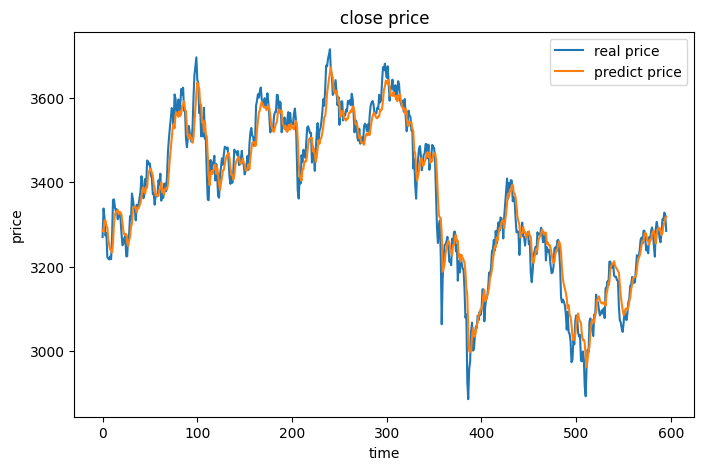

In [97]:
fig2 = plt.figure(figsize=(8,5))
plt.plot(y_train, label='real price')
plt.plot(y_train_predict, label='predict price')
plt.title('close price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

In [98]:
type(y[0])

numpy.float64

In [107]:
base_price_norm = list(price_norm[-8:])
predict_norm = []
for i in range(30):
    base_X = np.array(base_price_norm).reshape((1, 8, 1))
    
    next_price = model.predict(base_X.astype(np.float64))
    print(next_price)
    base_price_norm.pop(0)
    base_price_norm.append(next_price[0][0])
    print(base_price_norm)
    predict_norm.append(next_price[0][0])


1/1 [==============================] - 0s 19ms/step
[[0.8894644]]
[0.8769059339984983, 0.8827142384203996, 0.8915262813663242, 0.891068722630586, 0.8958434826141138, 0.8941316746380576, 0.8841918839846368, 0.8894644]
1/1 [==============================] - 0s 23ms/step
[[0.89035004]]
[0.8827142384203996, 0.8915262813663242, 0.891068722630586, 0.8958434826141138, 0.8941316746380576, 0.8841918839846368, 0.8894644, 0.89035004]
1/1 [==============================] - 0s 21ms/step
[[0.89069855]]
[0.8915262813663242, 0.891068722630586, 0.8958434826141138, 0.8941316746380576, 0.8841918839846368, 0.8894644, 0.89035004, 0.89069855]
1/1 [==============================] - 0s 38ms/step
[[0.89137316]]
[0.891068722630586, 0.8958434826141138, 0.8941316746380576, 0.8841918839846368, 0.8894644, 0.89035004, 0.89069855, 0.89137316]
1/1 [==============================] - 0s 19ms/step
[[0.8916224]]
[0.8958434826141138, 0.8941316746380576, 0.8841918839846368, 0.8894644, 0.89035004, 0.89069855, 0.89137316, 0.8

In [108]:
predict = [i*max(price) for i in predict_norm]

In [110]:
fig3 = plt.figure(figsize=(8,5))
plt.plot(predict, label='predict price')
plt.title('predict price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

TypeError: scatter() missing 1 required positional argument: 'y'

<Figure size 800x500 with 0 Axes>